# Introduction to Machine Learning

tree topics:
- training a machine learning model
- supervise learning
- unsupervise learning

## Machine learning introduciton
we collect a series of data points. and we design a model to extract knoledge.
input data x^(i), ouput data y^(i)

la funzione di regressione lineare f-teta è composta da una serie di parametri interni teta.
e prende in ingresso le varie x^(i)

d -> input vector length
s -> output vector length

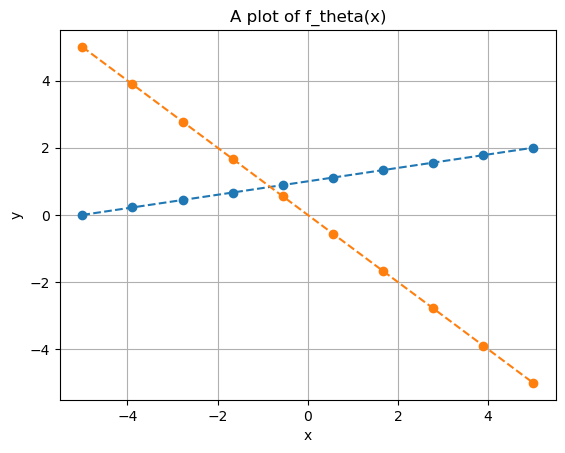

In [24]:
import numpy as np
import matplotlib.pyplot as plt

# Define parameterized function f,           <- this is a linear model
def f(theta, x):
    return theta[0] + theta[1] * x

# Choose two different values for the parameters
theta = (1, 0.2)
theta2 = (0, -1)

# Visualize the model prediction in the range [-5, 5]
xx = np.linspace(-5, 5, 10)
yy = f(theta, xx)
yy2 = f(theta2, xx)

plt.plot(xx, yy, 'o--')
plt.plot(xx, yy2, 'o--')
plt.grid()
plt.xlabel("x")
plt.ylabel("y")
plt.title("A plot of f_theta(x)")
plt.show()

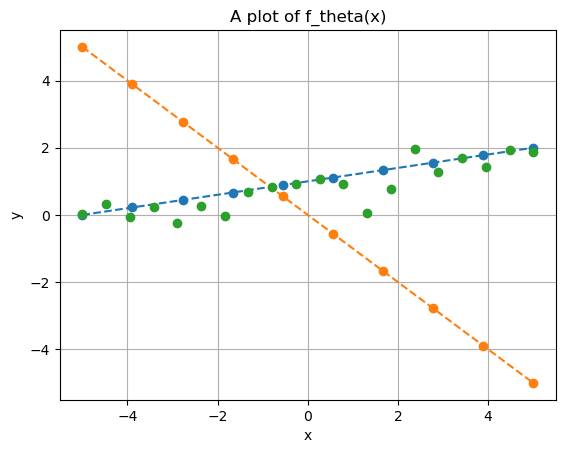

In [25]:
# Define synthetic datapoints
x_data = np.linspace(-5, 5, 20)
y_data = 1 + 0.2 * x_data + np.random.normal(0, 0.5, x_data.shape)

# Plot
plt.plot(xx, yy, 'o--')
plt.plot(xx, yy2, 'o--')
plt.plot(x_data, y_data, 'o')
plt.grid()
plt.xlabel("x")
plt.ylabel("y")
plt.title("A plot of f_theta(x)")
plt.show()

abbiamo bisogno di codificare le stringhe in valori numerici:
    
integer encoding of string -> stringe convertite in numeri incrementali  1,2,3...ecc. questa tecnica causa però un associazione di ordine tra le parole

one-hot encoding -> ogni parola è codificata con un vettori con tutti 0 apparte un 1., La lunghezza dell arrey dipende dal numero di parole nell insieme che stiamo considerando
causa comunque delle associazioni di tipo spaziale

Learn embedding -> le parole sono rappresentate con un vettore, i cui valori vengono assegnati in base alle associazioni che hanno con gli altri valori

# Gradient descend algoritm

In [26]:
import numpy as np

# simple loss function (Mock loss function for demonstration)
def l(theta):
    """
    we assume theta to be a 2-dimensional vector (theta_1,theta_2)
    in the form of a numpy array with shape (2,)
    """
    return (theta[0]-1)**2 + (theta[1]-2)**2

def grad_l(theta):
    return np.array([2*(theta[0]-1), 2*(theta[1]-2)])

# l -> loss as a function
# grad_l -> gradient of the loss function
# theta -> current parameters
# eta ->  initial step size
# maxit -> max number of iteration
def GD(l, grad_l, theta_0, eta, maxit):
    # GD step
    for k in range(maxit):
        theta = theta_0 - eta * grad_l(theta)
        theta_0 = theta
    return theta, k


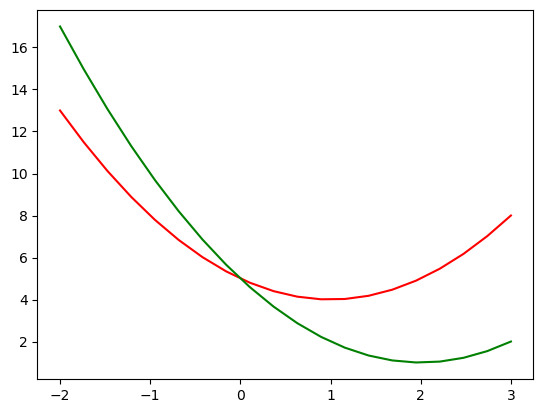

In [27]:
# visualize how the loss changes when we change each parameter separately
theta_values = np.linspace(-2, 3, 20)
loss_theta_1_change = [l(np.array([theta1, 0])) for theta1 in theta_values]
loss_theta_2_change = [l(np.array([0, theta2])) for theta2 in theta_values]
# Use a valid color string 'r' (red). '-r' is not a valid color value for the color= parameter.
plt.plot(theta_values, loss_theta_1_change, color='r')
plt.plot(theta_values, loss_theta_2_change, color='g')

In [28]:
# Test the algorithm
# Cosi troviamo i valori che danno il numero minimo con la funzione?
theta_0 = np.array([0,0]) # initial parameters set to zero
eta = 0.1
maxit = 100

theta_opt, k = GD(l, grad_l, theta_0, eta, maxit)
print(theta_opt)
print(l(theta_0))
print(l(theta_opt))

UnboundLocalError: cannot access local variable 'theta' where it is not associated with a value

# Backtracking line search:

In [ ]:
import numpy as np

def backtracking(L, grad_L, theta, eta0=1.0, beta=0.5, c=1e-4):
    """
    Return a step size eta that satisfies the Armijo condition:
        L(theta - eta*g) <= L(theta) - c * eta * ||g||^2
    Inputs:
      - L:      R^n -> R
      - grad_L: R^n -> R^d
      - theta:  current point (np.ndarray)
      - eta0:   initial step size
      - beta:   shrinking factor in (0,1)
      - c:      Armijo constant in (0,1)
    """
    eta = eta0
    g = grad_L(theta)
    g_norm2 = np.dot(g, g)
    while L(theta - eta * g) > L(theta) - c * eta * g_norm2:
        eta *= beta
    return eta

In [ ]:
def GD_backtracking(l, grad_l, theta_0, maxit):
    # GD step
    for k in range(maxit):
        eta = backtracking(l, grad_l, theta_0)
        theta = theta_0 - eta * grad_l(theta_0)
        theta_0 = theta
    return theta, k

In [ ]:
# Test the algorithm
# Cosi troviamo i parametri che minimizzano la funzione (loss function)
theta_0 = np.array([0,0])
maxit = 100

theta_opt, k = GD_backtracking(l, grad_l, theta_0, maxit)
print(theta_opt)
print(l(theta_0))
print(l(theta_opt))

[1. 2.]
5
0.0


# Altre condizioni

ha senso aggiungere altre condizioni come tolL e tolTheta,
la prima controlla che il gradiente non sia troppo piccolo,
la seconda controlla che non sia troppo piccola la differenza tra theta e theta_0

In [ ]:
def GD_backtracking2(l, grad_l, theta_0, maxit, tolL, tolTheta):
    # GD step
    for k in range(maxit):
        eta = backtracking(l, grad_l, theta_0)
        theta = theta_0 - eta * grad_l(theta_0)
        theta_0 = theta

        # viene fatta la norma per poter avere una misura scalare del vettore (o se theta fosse una matrice della matrice)
        # linalg.norm di base fa la norma 2 per i vettori e la norma di Frobenius per le matrici
        if(np.linalg.norm(grad_l(theta)<tolL) or (np.linalg.norm(theta-theta_0)<tolTheta)):
            break
    return theta, k

In [ ]:
# Test the algorithm
# Cosi troviamo i valori che danno il numero minimo con la funzione?
theta_0 = np.array([0,0])
maxit = 100
tolL = 1e-6
tolTheta = 1e-6

theta_opt, k = GD_backtracking2(l, grad_l, theta_0, maxit, tolL, tolTheta)
print(theta_opt)
print(l(theta_0))
print(l(theta_opt))

NameError: name 'backtracking' is not defined